# Data processing

## Imports and globals

In [153]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

FILE_NAME = "datos-crudos.csv"
UNUSED_COLUMNS = ["nombre", "historia", "fecha", "diagnostico"]

In [154]:
df = pd.read_csv(FILE_NAME)
print(df.head())

                        nombre  edad  historia     fecha  cancer  diagnostico  \
0  DIMANA ALEKSANDROVA SLAVOVA  41.0  462830.0  19/04/22       1          NaN   
1          ENRIQUE CLAVER SANZ  73.0   48040.0  14/12/22       1          NaN   
2      FERNANDO CARRERES FALCO  67.0   46465.0  21/12/21       1          NaN   
3           RAMON SEGURA LOPEZ  68.0  205449.0  04/04/23       1          NaN   
4     JOSE MARIA SANCHO PARETS  83.0  200475.0  08/10/21       1          NaN   

   filtrado-glomerular-estimado  glucosa creatinina  urea  ... eosinofilos  \
0                           NaN     83.0       0.67  29.0  ...         0.8   
1                          43.0    154.0       1.60  82.0  ...         4.0   
2                         149.0     94.0       0.55  22.0  ...         1.6   
3                          97.0     83.0       0.70  30.0  ...         1.5   
4                          66.0     96.0       1.07  40.0  ...         4.5   

  basofilos    N    L    M    E    B plaquet

In [155]:
# Remove unused columns
df = df.drop(columns=UNUSED_COLUMNS)

In [156]:
# Convert every string into float value
df = df.apply(pd.to_numeric, errors='coerce')

In [157]:
# Convert every value other than 0 in "cancer" to 1
df['cancer'] = df['cancer'].apply(lambda x: 1 if x != 0 else x)

## Random forest formula

In [158]:
def RandomForest(iterations, _df, _target):
    # Make a loop of train and test sepparations with different random states
    results = []
    for i in range(iterations):
        # Prepare a random forest classifier and use df_filled with sepparated trained and test fragments
        clf = RandomForestClassifier(n_estimators=100)
        X_train, X_test, y_train, y_test = train_test_split(_df, _target, test_size=0.2, random_state=i)
        # Train the classifier
        clf.fit(X_train, y_train)
        # Show results
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        # Save the resulting model in an array of results
        results.append(clf)
    return results, X_train, X_test, y_train, y_test

In [159]:
def ConfusionMatrix(results, X_test, y_test):
    # Create a resulting y_test and y_pred from the results
    y_pred_m = []
    y_test_m = []
    for i in range(len(results)):
        y_pred_m.extend(results[i].predict(X_test))
        y_test_m.extend(y_test)
    # Classification matrix with the real target and predicted target
    sns.heatmap(pd.crosstab(y_test_m, y_pred_m, rownames=['Real'], colnames=['Predicción']), annot=True, fmt='d')
    plt.show()
    return y_test_m, y_pred_m

## Full data classification

In [160]:
# Drop columns that have at least one empty data
df_full_data = df.dropna(axis=1)
# Print the columns names
print(df_full_data.columns)

Index(['cancer', 'glucosa', 'GPT', 'sodio', 'cloruro'], dtype='object')


In [161]:
# Sepparate the "cancer" column into a target dataframe
target_full_data = df_full_data["cancer"]
# Drop the "cancer" column from the dataframe
df_full_data = df_full_data.drop(columns=["cancer"])

In [162]:
# Make a loop of train and test sepparations with different random states
results = []
results, X_train, X_test, y_train, y_test = RandomForest(10, df_full_data, target_full_data)

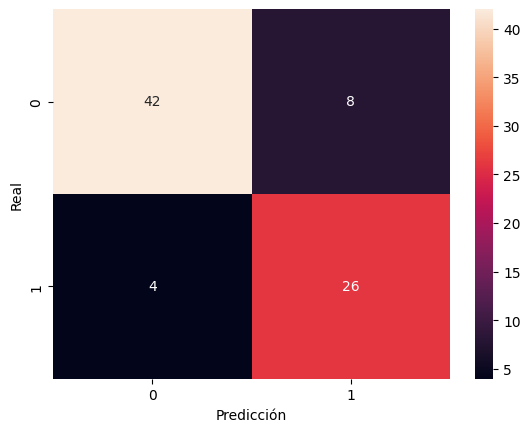

In [163]:
y_test_m, y_pred_m = ConfusionMatrix(results, X_test, y_test)

## Filling data

In [164]:
# On df assume an empty dala cell has the same value as the mode of that column, set the result and save it in a dataframe
df_filled = df.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == "object" else x)

### Random Forest

In [165]:
# target is "cancer"
target_filled = df_filled["cancer"]
# Drop the "cancer" column from the dataframe
df_filled = df_filled.drop(columns=["cancer"])
results, X_train, X_test, y_train, y_test = RandomForest(10, df_filled, target_filled)

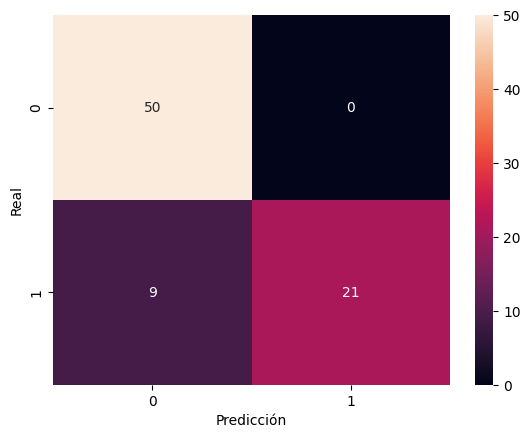

In [166]:
y_test_m, y_pred_m = ConfusionMatrix(results, X_test, y_test)

## Blood data

In [167]:
BLOOD_COLUMNS = ["cancer", "hematies","hemoglobina","hematocrito","MCV","MCH","MCHC","RDW","leucocitos","neutrofilos","linfocitos","monocitos","eosinofilos","basofilos","N","L","M","E","B","plaquetas","MPV","velocidad-sedimentacion-globular"]

In [168]:
df_blood = df[BLOOD_COLUMNS]
# Sepparate cancer target
target_blood = df_blood["cancer"]
df_blood = df_blood.drop("cancer", axis=1)
print(len(df_blood))
print(df_blood.columns)

36
Index(['hematies', 'hemoglobina', 'hematocrito', 'MCV', 'MCH', 'MCHC', 'RDW',
       'leucocitos', 'neutrofilos', 'linfocitos', 'monocitos', 'eosinofilos',
       'basofilos', 'N', 'L', 'M', 'E', 'B', 'plaquetas', 'MPV',
       'velocidad-sedimentacion-globular'],
      dtype='object')


In [169]:
results, X_train, X_test, y_train, y_test = RandomForest(10, df_blood, target_blood)

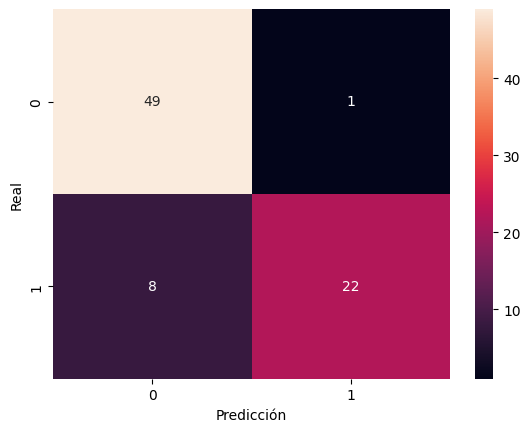

In [170]:
y_test_m, y_pred_m = ConfusionMatrix(results, X_test, y_test)